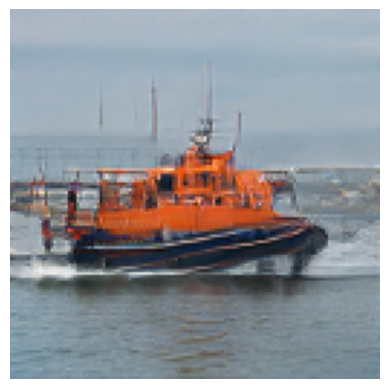

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

# Load BigGAN 128 module.
module_url = 'https://tfhub.dev/deepmind/biggan-128/2'
module = hub.KerasLayer(module_url)

# Define the ImageNet label index for "tug boat"
# 625 lifeboat
# 628 Ocean Liner
# 510 Container Ship
# 554 fireboat
# 484 Catamaran
# 724 Pirate (Wooden Sailboat)
# 814 Speedboat
# 914 Yawl
# 871 Trimaran
# 833 Submarine, Pigboat, Uboat
# 403 Aircraft Carrier
# 780 Schooner
tug_boat_index = 625  # ImageNet label index

# Set the batch size and truncation value
batch_size = 1
truncation = 0.5 #.5

# Sample random noise (z) and set the label (y) to "tug boat"
z = truncation * tf.random.truncated_normal([batch_size, 120])
y = tf.one_hot([tug_boat_index] * batch_size, 1000)

# Generate the image
inputs = {'z': z, 'y': y, 'truncation': truncation}
samples = module(inputs)

# Convert the generated image to the range [0, 255] and cast to uint8
samples = (samples + 1) * 127.5
samples = tf.cast(samples, tf.uint8)

# Display or save the generated image
import matplotlib.pyplot as plt

plt.imshow(samples[0])
plt.axis('off')
plt.show()

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load BigGAN 128 module
module_url = 'https://tfhub.dev/deepmind/biggan-128/2'
module = hub.KerasLayer(module_url)

# Define the ImageNet label index for "tug boat"
tug_boat_index = 625

# Set the batch size and truncation value
batch_size = 1
truncation = 0.5

# Set the number of images to generate
num_images = 90

# Create a directory to store the generated images
output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)

# Set the desired image size
desired_size = (256, 256)

for i in range(num_images):
    # Sample random noise (z) and set the label (y) to "tug boat"
    z = truncation * tf.random.truncated_normal([batch_size, 120])
    y = tf.one_hot([tug_boat_index] * batch_size, 1000)

    # Generate the image
    inputs = {'z': z, 'y': y, 'truncation': truncation}
    samples = module(inputs)

    # Convert the generated image to the range [0, 255] and cast to uint8
    samples = (samples + 1) * 127.5
    samples = tf.cast(samples, tf.uint8)

    # Resize the image to the desired size
    image = Image.fromarray(samples[0].numpy())
    resized_image = image.resize(desired_size, Image.ANTIALIAS)

    # Save the resized image to the output directory
    image_path = os.path.join(output_dir, f"generated_image_{i+1}.png")
    resized_image.save(image_path)
    print(f"Saved image {i+1} to {image_path}")

<ipython-input-1-f18326422bf9>:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(desired_size, Image.ANTIALIAS)


Saved image 1 to generated_images/generated_image_1.png
Saved image 2 to generated_images/generated_image_2.png
Saved image 3 to generated_images/generated_image_3.png
Saved image 4 to generated_images/generated_image_4.png
Saved image 5 to generated_images/generated_image_5.png
Saved image 6 to generated_images/generated_image_6.png
Saved image 7 to generated_images/generated_image_7.png
Saved image 8 to generated_images/generated_image_8.png
Saved image 9 to generated_images/generated_image_9.png
Saved image 10 to generated_images/generated_image_10.png
Saved image 11 to generated_images/generated_image_11.png
Saved image 12 to generated_images/generated_image_12.png
Saved image 13 to generated_images/generated_image_13.png
Saved image 14 to generated_images/generated_image_14.png
Saved image 15 to generated_images/generated_image_15.png
Saved image 16 to generated_images/generated_image_16.png
Saved image 17 to generated_images/generated_image_17.png
Saved image 18 to generated_imag

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
https://www.tensorflow.org/hub/tutorials/biggan_generation_with_tf_hub
https://github.com/ivclab/BigGAN-Generator-Pretrained-Pytorch/blob/master/README.md


In [2]:
import os
import zipfile

# Specify the folder containing the images
folder_path = "generated_images"

# Create a ZIP archive of the folder
zip_filename = "generated_images.zip"
with zipfile.ZipFile(zip_filename, "w") as zip_file:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zip_file.write(file_path, os.path.relpath(file_path, folder_path))

print(f"ZIP archive '{zip_filename}' created successfully.")

ZIP archive 'generated_images.zip' created successfully.


In [3]:
from google.colab import files

files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

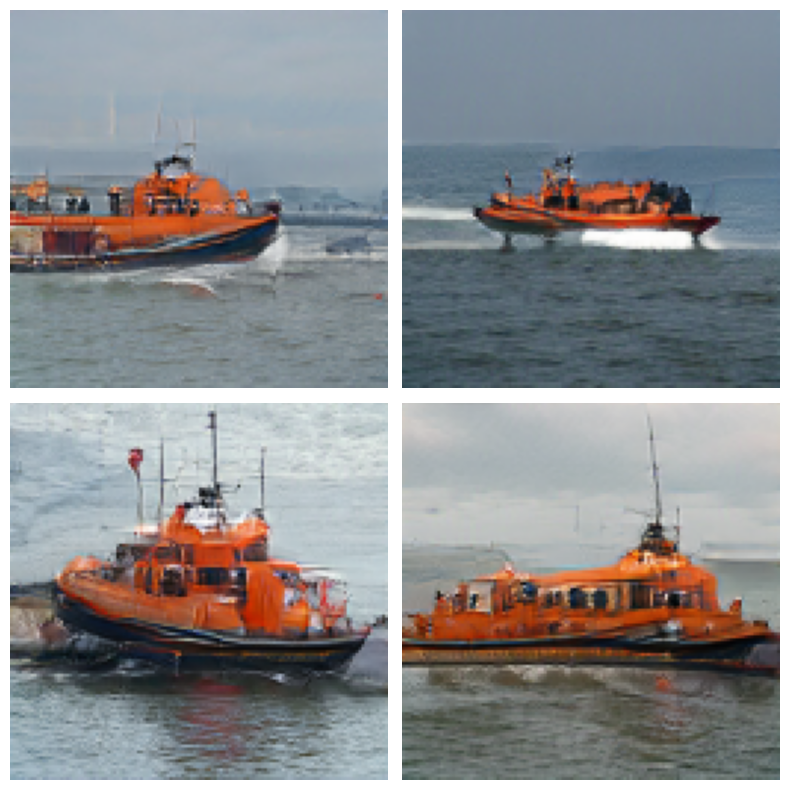

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Load BigGAN 128 module
module_url = 'https://tfhub.dev/deepmind/biggan-128/2'

module = hub.KerasLayer(module_url)

# Define the ImageNet label index for "lifeboat"
lifeboat_index = 625  # ImageNet label index for "lifeboat"

# Set the batch size and truncation value
batch_size = 4
truncation = 0.5

# Sample random noise (z) and set the label (y) to "lifeboat"
z = truncation * tf.random.truncated_normal([batch_size, 120])
y = tf.one_hot([lifeboat_index] * batch_size, 1000)

# Generate the images
inputs = {'z': z, 'y': y, 'truncation': truncation}
samples = module(inputs)

# Convert the generated images to the range [0, 255] and cast to uint8
samples = (samples + 1) * 127.5
samples = tf.cast(samples, tf.uint8)

# Display the generated images in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in range(batch_size):
    ax = axs[i // 2, i % 2]
    ax.imshow(samples[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
#!pip install Pillow

<ipython-input-4-fc553935b116>:49: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width, height), Image.ANTIALIAS)  # Resize the image


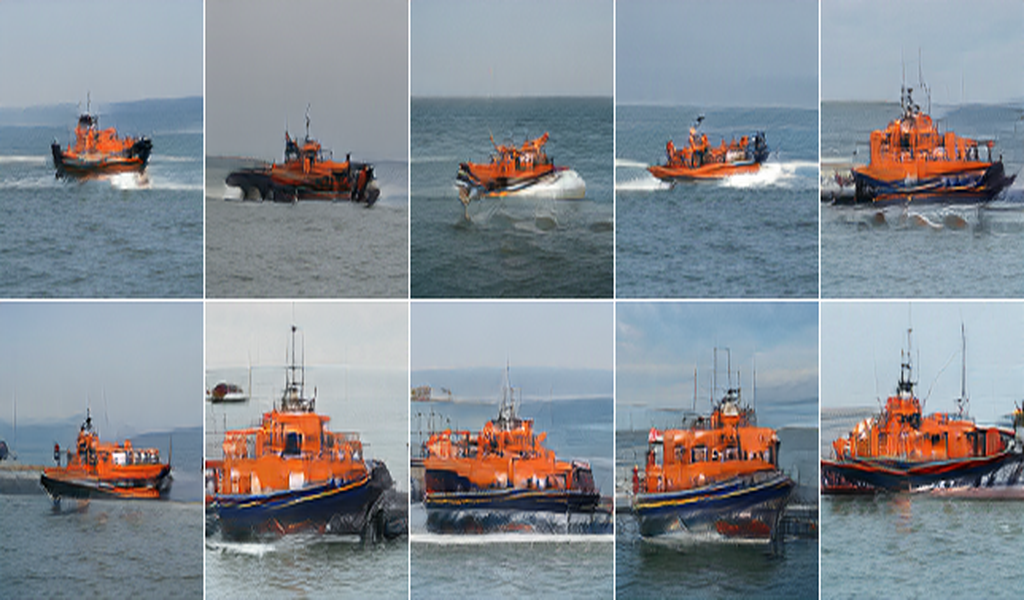

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm
import io
from PIL import Image
import IPython

module_url = 'https://tfhub.dev/deepmind/biggan-128/2'
module = hub.KerasLayer(module_url)

def truncated_z_sample(batch_size, truncation, seed=None):
    state = None if seed is None else np.random.RandomState(seed)
    values = truncnorm.rvs(-2, 2, size=(batch_size, 120), random_state=state)
    return truncation * values

def sample(module, z, y, truncation):
    inputs = {'z': z, 'y': y, 'truncation': truncation}
    return module(inputs)

def imgrid(imarray, cols=5, pad=1):
    if imarray.dtype != np.uint8:
        raise ValueError('imgrid input imarray must be uint8')
    pad = int(pad)
    assert pad >= 0
    cols = int(cols)
    assert cols >= 1
    N, H, W, C = imarray.shape
    rows = int(np.ceil(N / cols))
    batch_pad = rows * cols - N
    assert batch_pad >= 0
    post_pad = [batch_pad, pad, pad, 0]
    pad_arg = [[0, p] for p in post_pad]
    imarray = np.pad(imarray, pad_arg, 'constant', constant_values=255)
    H += pad
    W += pad
    grid = (imarray
            .reshape(rows, cols, H, W, C)
            .transpose(0, 2, 1, 3, 4)
            .reshape(rows*H, cols*W, C))
    if pad:
        grid = grid[:-pad, :-pad]
    return grid

def imshow(a, format='png', jpeg_fallback=True, width=512, height=512):
    a = np.asarray(a, dtype=np.uint8)
    image = Image.fromarray(a)
    image = image.resize((width, height), Image.ANTIALIAS)  # Resize the image
    data = io.BytesIO()
    image.save(data, format)
    im_data = data.getvalue()
    try:
        disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
        if jpeg_fallback and format != 'jpeg':
            print ('Warning: image was too large to display in format "{}"; '
                   'trying jpeg instead.').format(format)
            return imshow(a, format='jpeg', width=width, height=height)
        else:
            raise
    return disp

lifeboat_index = 625
fireboat_index = 554
yawl_index = 914

num_samples = 10
truncation = 0.4
noise_seed = 0

z = truncated_z_sample(num_samples, truncation, noise_seed)
y = tf.one_hot([lifeboat_index] * num_samples, 1000)

ims = sample(module, z, y, truncation)
ims = (ims + 1) * 127.5
ims = tf.cast(ims, tf.uint8).numpy()

imshow(imgrid(ims, cols=min(num_samples, 5)), width=1024, height=600)

# Conditioning To Tugboat

In [1]:
#!pip install roboflow
#!pip install ultralytics==8.0.196
#!pip install tensorflow-addons

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from roboflow import Roboflow

rf = Roboflow(api_key="VAAmaV7sJTB0v6rGIJfB")
project = rf.workspace("dluva").project("ship-vessel-identification")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Ship-Vessel-Identification-3 in yolov8:: 100%|██████████| 1420/1420 [00:00<00:00, 3280.36it/s]


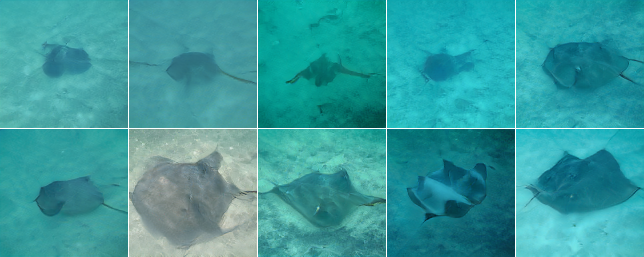

In [25]:
import os
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import truncnorm
import numpy as np
import PIL.Image
import io
import IPython.display


# Load BigGAN 128 module
module_url = 'https://tfhub.dev/deepmind/biggan-128/2'
module = hub.KerasLayer(module_url)


# Utility functions for BigGAN sampling and displaying images
def truncated_z_sample(batch_size, truncation=1., seed=None):
    state = None if seed is None else np.random.RandomState(seed)
    values = truncnorm.rvs(-2, 2, size=(batch_size, 120), random_state=state)
    return truncation * values

def one_hot(index, vocab_size=1000):
    index = np.asarray(index)
    if len(index.shape) == 0:
        index = np.asarray([index])
    assert len(index.shape) == 1
    num = index.shape[0]
    output = np.zeros((num, vocab_size), dtype=np.float32)
    output[np.arange(num), index] = 1
    return output

@tf.function
def sample(z, y, truncation=1., batch_size=8):
    y = one_hot(y, vocab_size=1000)
    y = tf.repeat(y, batch_size, axis=0)  # Repeat y to match the batch size of z
    return module(dict(y=y, z=z, truncation=truncation))

def imgrid(imarray, cols=5, pad=1):
    if imarray.dtype != np.uint8:
        raise ValueError('imgrid input imarray must be uint8')
    pad = int(pad)
    assert pad >= 0
    cols = int(cols)
    assert cols >= 1
    N, H, W, C = imarray.shape
    rows = N // cols + int(N % cols != 0)
    batch_pad = rows * cols - N
    assert batch_pad >= 0
    post_pad = [batch_pad, pad, pad, 0]
    pad_arg = [[0, p] for p in post_pad]
    imarray = np.pad(imarray, pad_arg, 'constant', constant_values=255)
    H += pad
    W += pad
    grid = (imarray
            .reshape(rows, cols, H, W, C)
            .transpose(0, 2, 1, 3, 4)
            .reshape(rows*H, cols*W, C))
    if pad:
        grid = grid[:-pad, :-pad]
    return grid

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
        disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
        if jpeg_fallback and format != 'jpeg':
            print(('Warning: image was too large to display in format "{}"; '
                   'trying jpeg instead.').format(format))
            return imshow(a, format='jpeg')
        else:
            raise
    return disp

# Generate tugboat images using conditional sampling
num_samples = 10
truncation_value = 0.4
noise_seed = 0
category = "6) tugboat"  # Assuming tugboat is class 6 in your dataset (0-indexed)

z = truncated_z_sample(num_samples, truncation_value, noise_seed)
y = int(category.split(')')[0])
ims = sample(z, y, truncation=truncation_value, batch_size=num_samples).numpy()
ims = np.clip(((ims + 1) / 2.0) * 256, 0, 255)
ims = np.uint8(ims)
imshow(imgrid(ims, cols=min(num_samples, 5)))